<a href="https://colab.research.google.com/github/zaininijar/machine-learning-examing-data/blob/master/ExaimingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df = pd.read_csv(url, names=column_names, skipinitialspace=True, na_values="?")

df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [ ]:
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.790486
income            0.000000
dtype: float64


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.describe(include=["object"])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
df['income'].value_counts(normalize=True)

,proportion
income,
<=50K,0.75919
>50K,0.24081


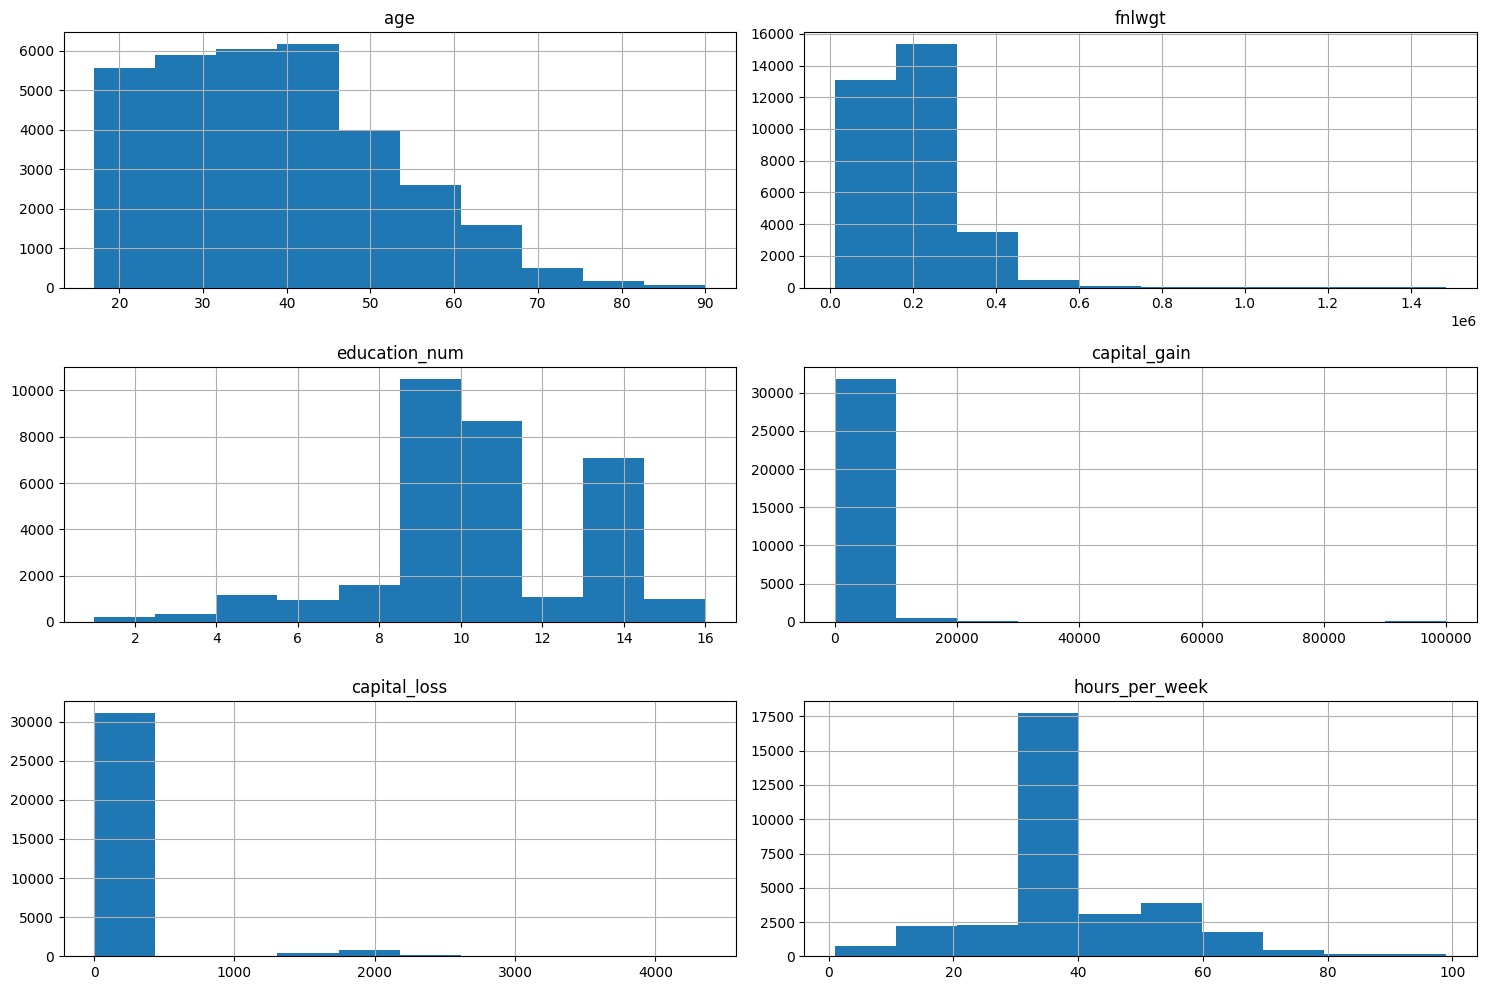

In [ ]:
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

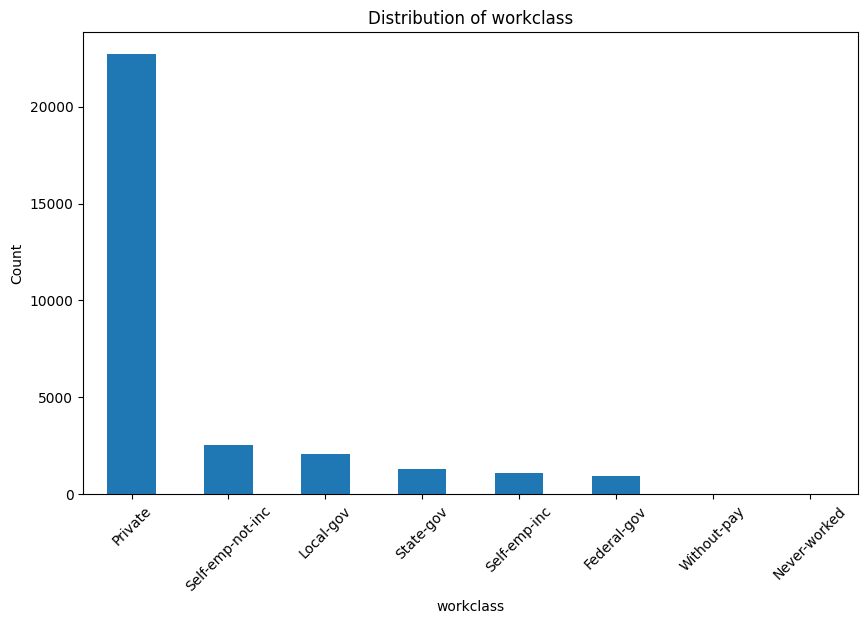

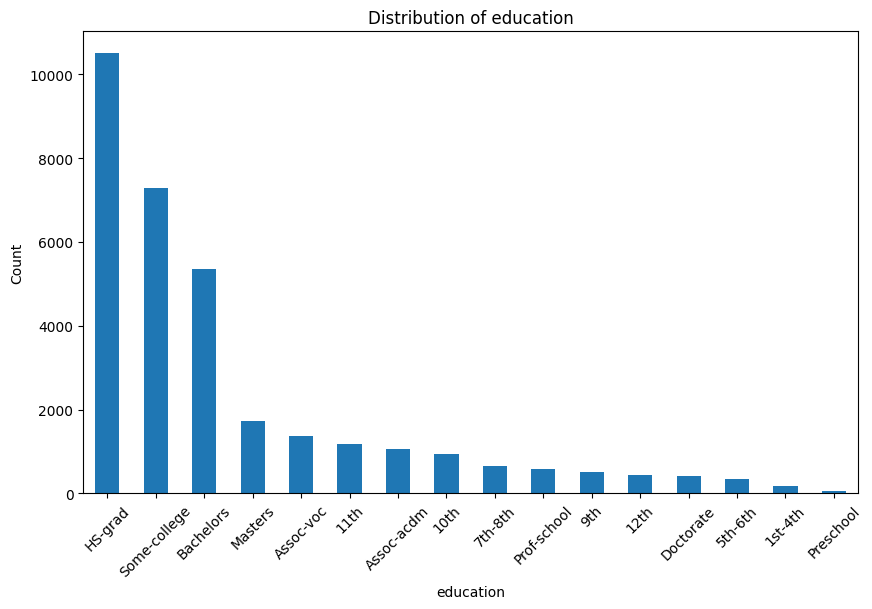

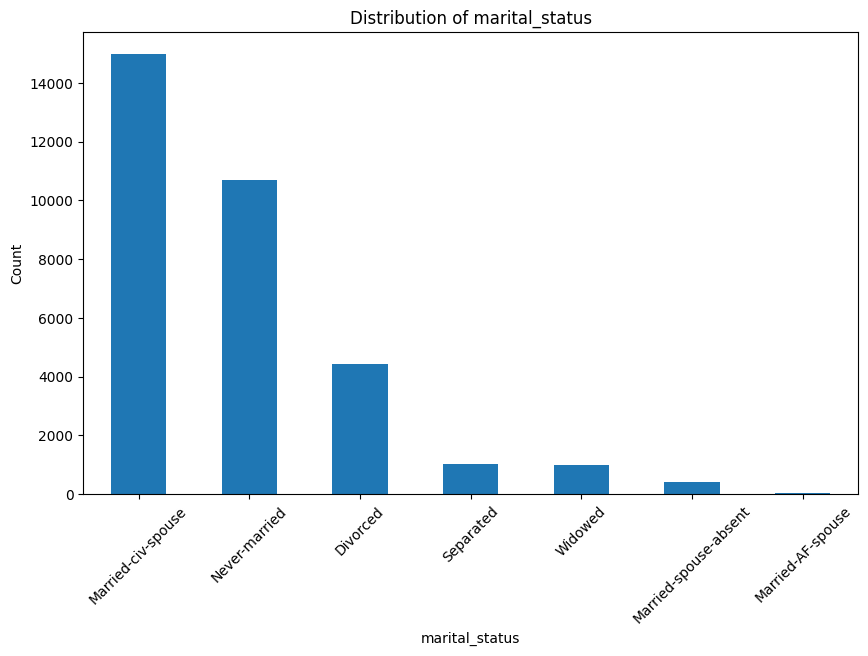

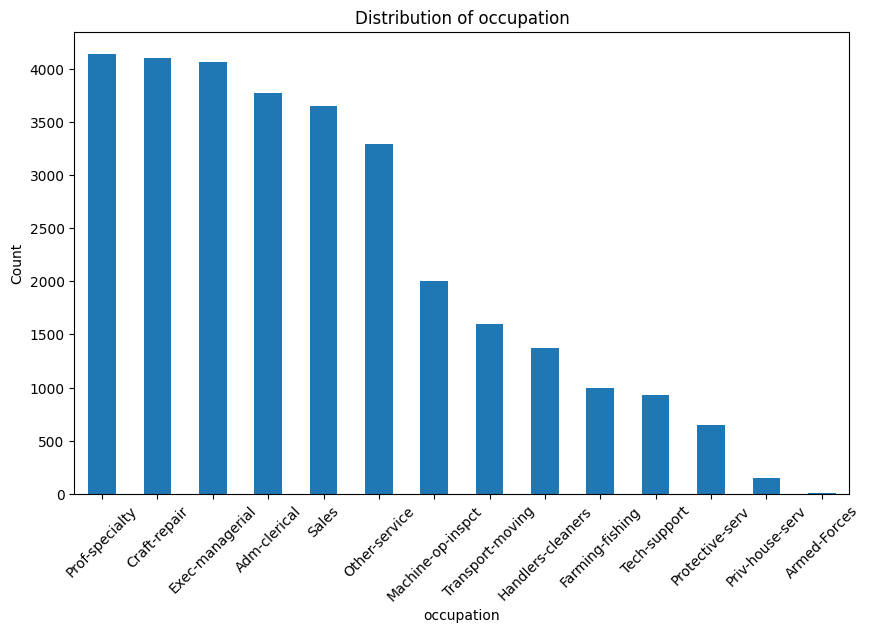

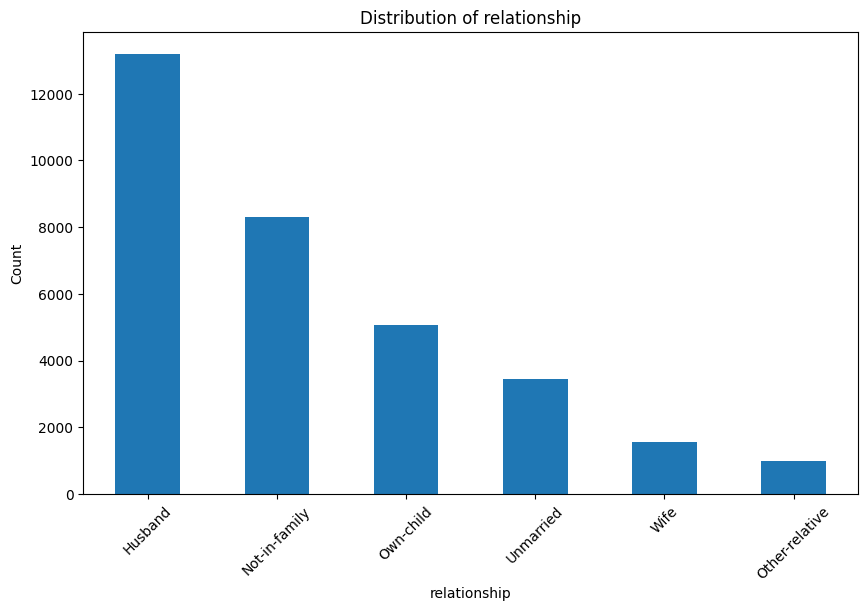

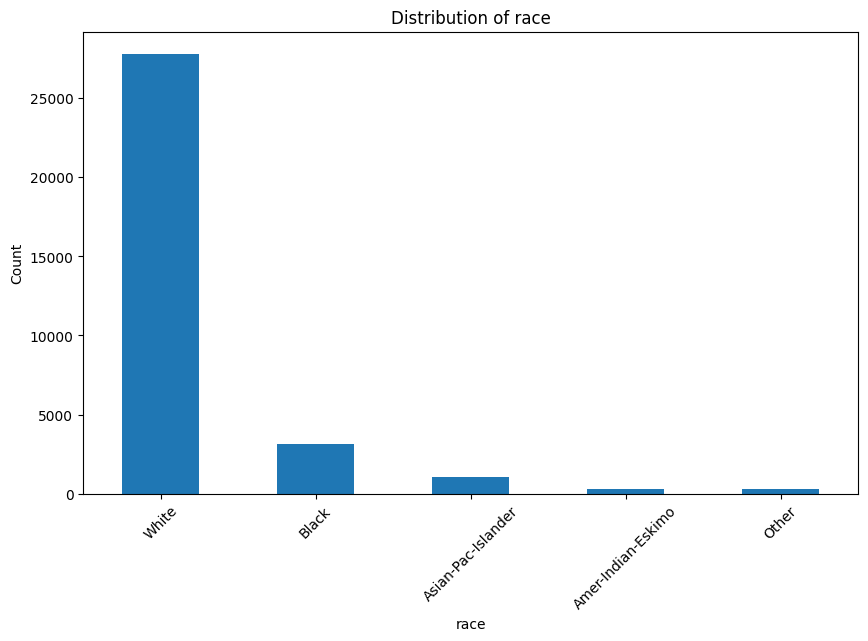

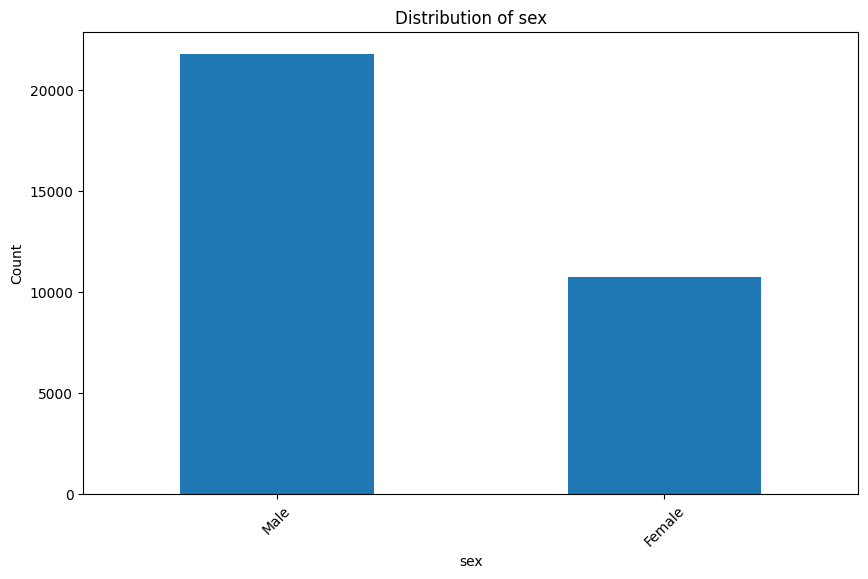

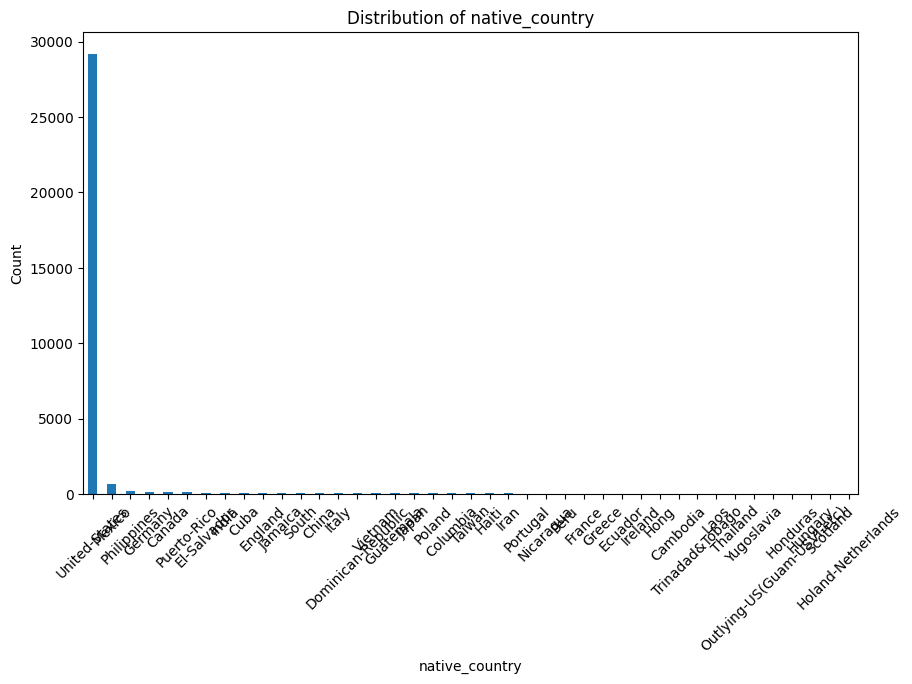

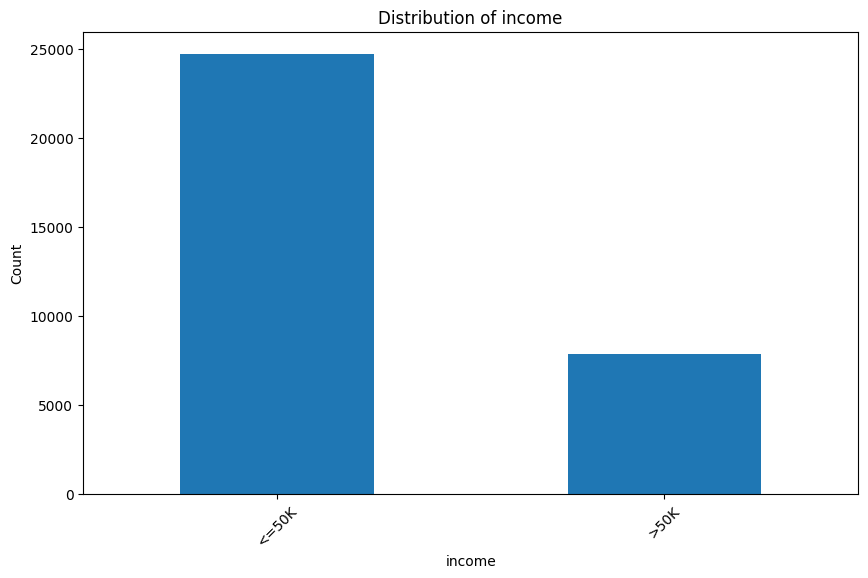

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
  plt.figure(figsize=(10, 6))
  df[feature].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {feature}')
  plt.ylabel('Count')
  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.show()

Analisa Korelasi

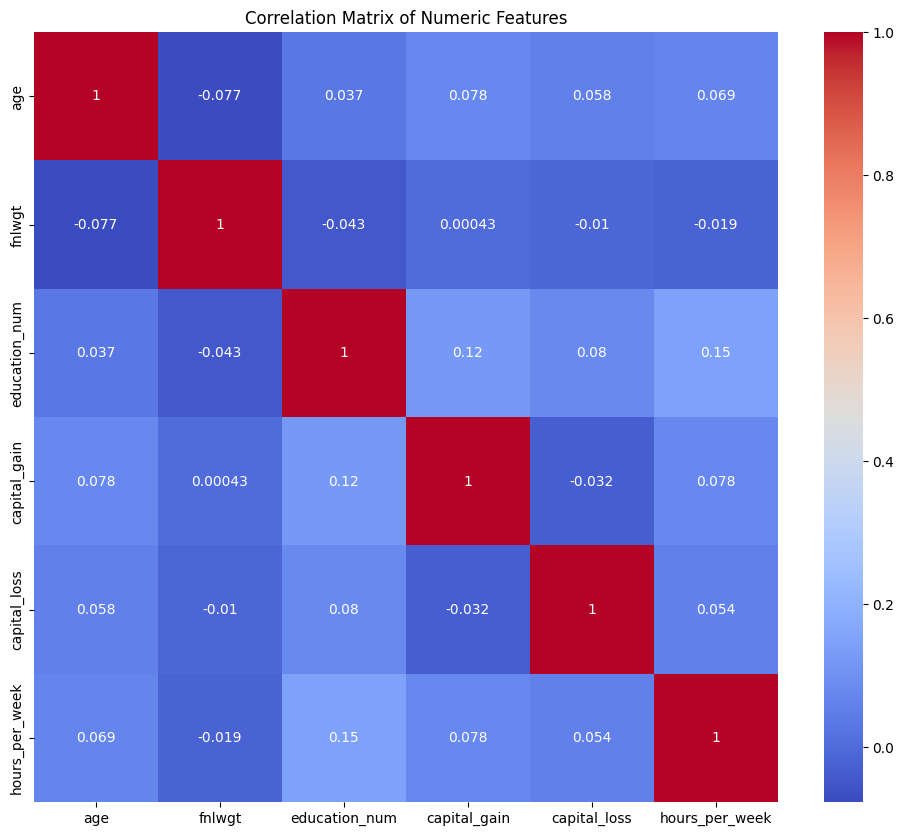

In [ ]:
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

**Analisis Hubungan Target Variabel**
*yang ada titik bulat merupakan outlayer/anomali*

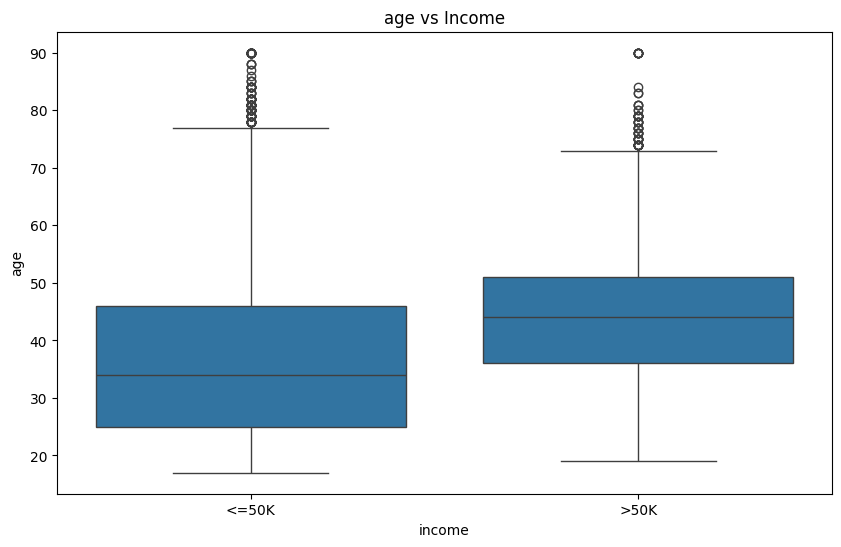

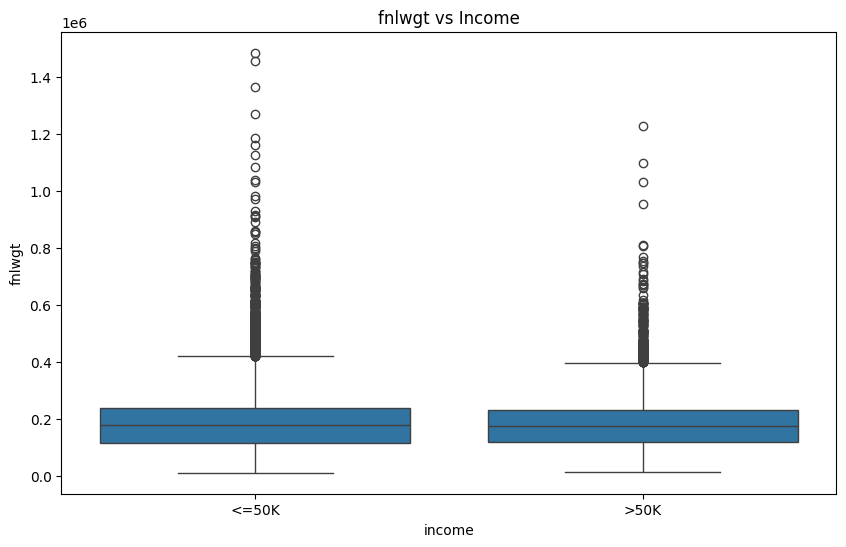

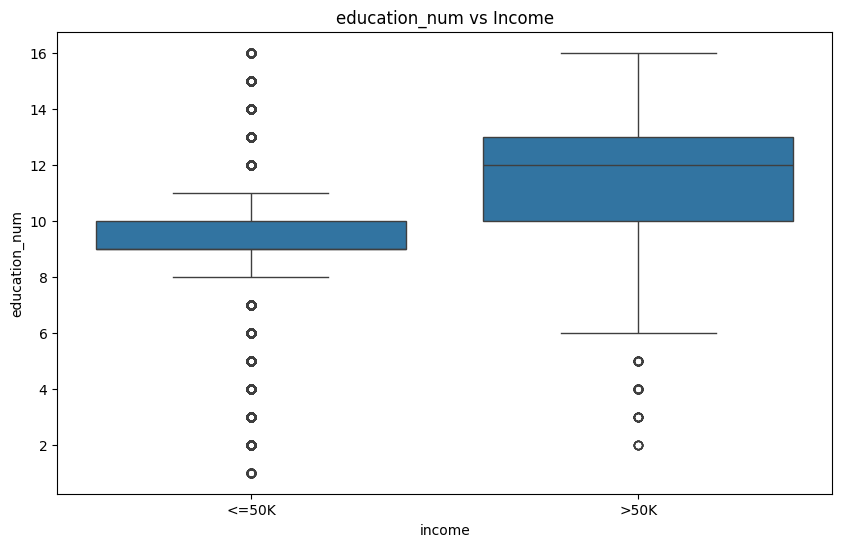

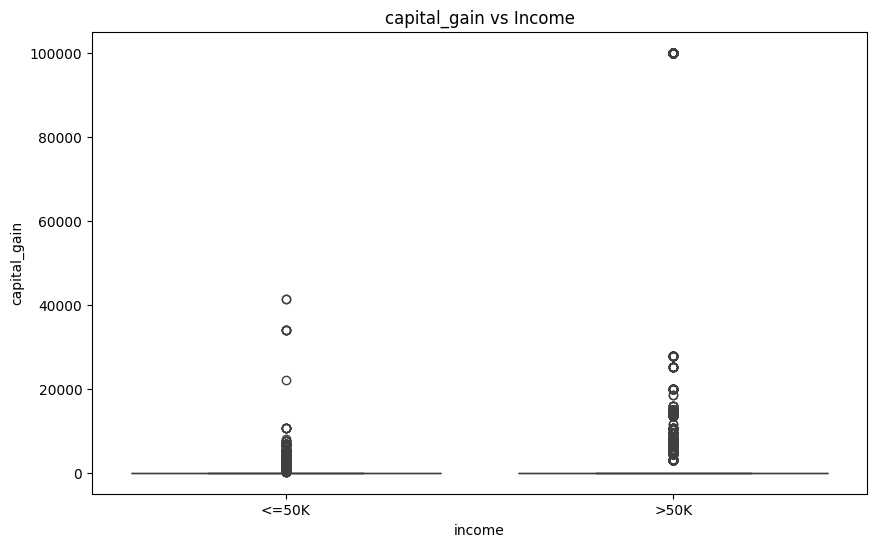

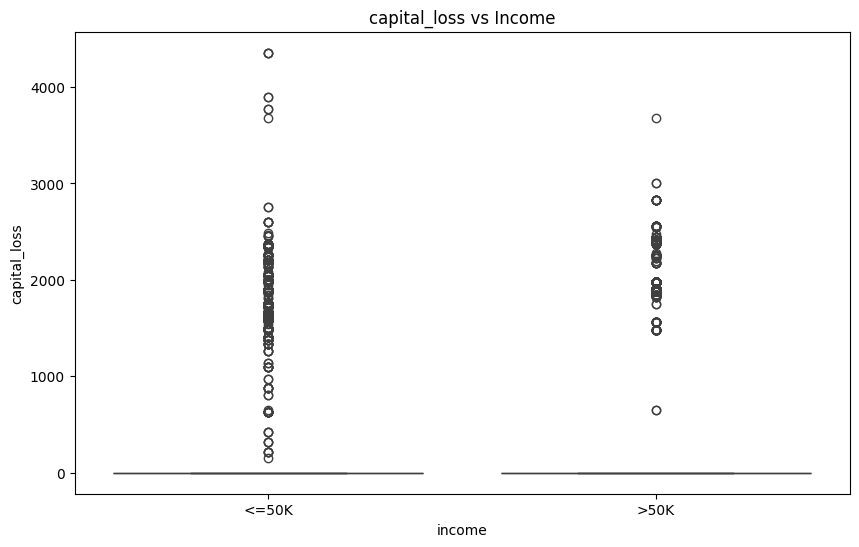

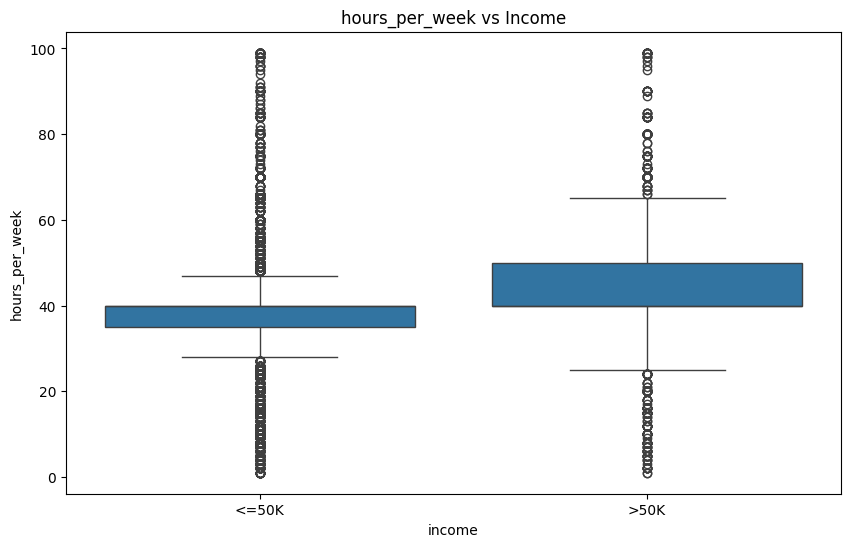

In [18]:
for feature in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='income', y=feature, data=df)
  plt.title(f'{feature} vs Income')
  plt.show()

<Figure size 1800x600 with 0 Axes>

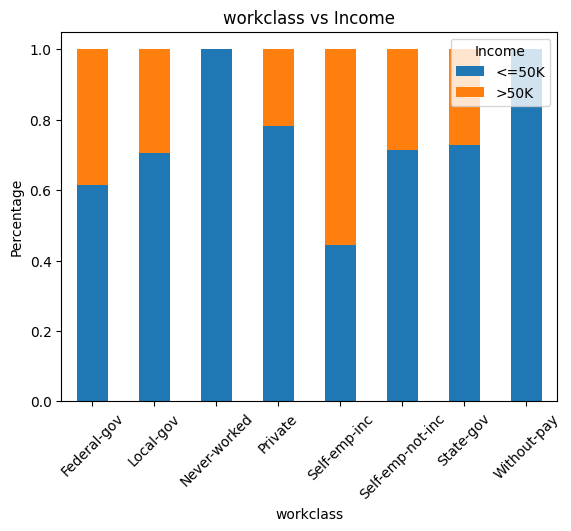

<Figure size 1800x600 with 0 Axes>

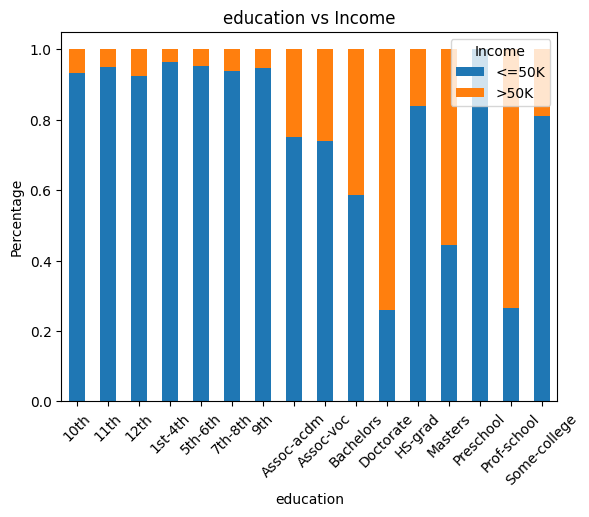

<Figure size 1800x600 with 0 Axes>

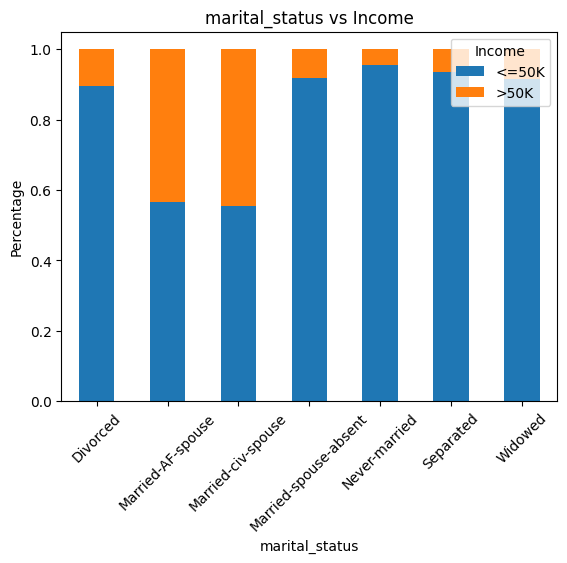

<Figure size 1800x600 with 0 Axes>

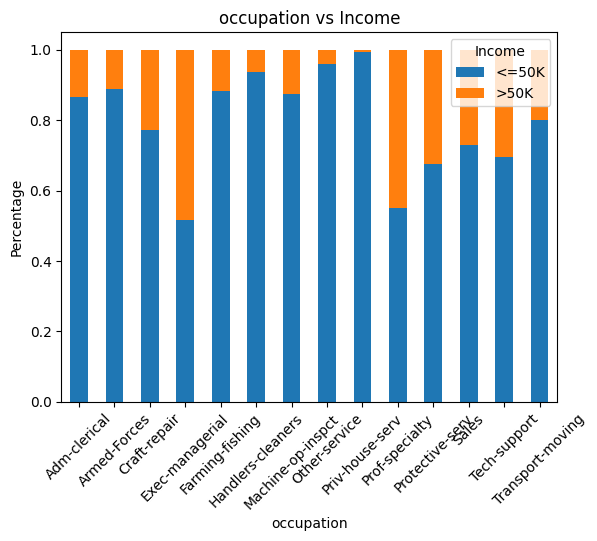

<Figure size 1800x600 with 0 Axes>

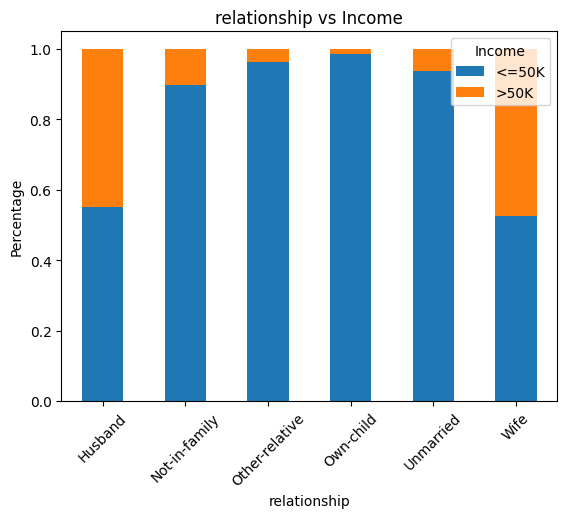

<Figure size 1800x600 with 0 Axes>

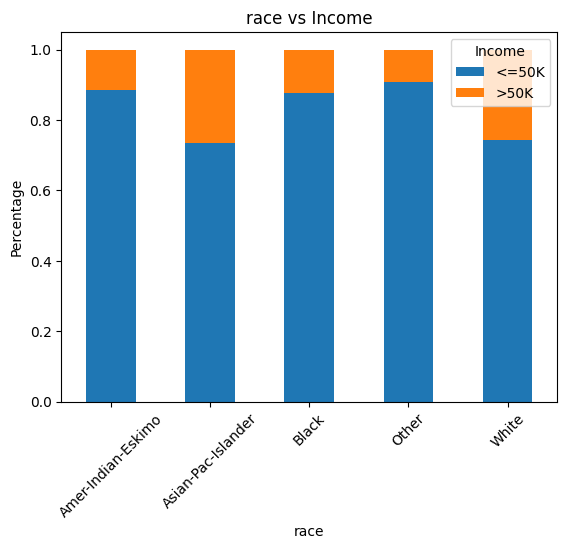

<Figure size 1800x600 with 0 Axes>

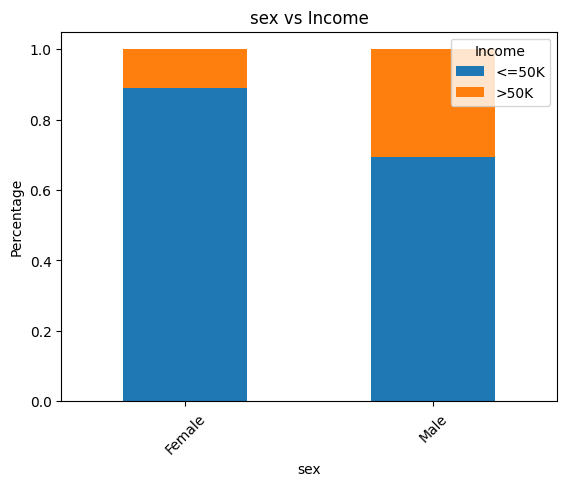

<Figure size 1800x600 with 0 Axes>

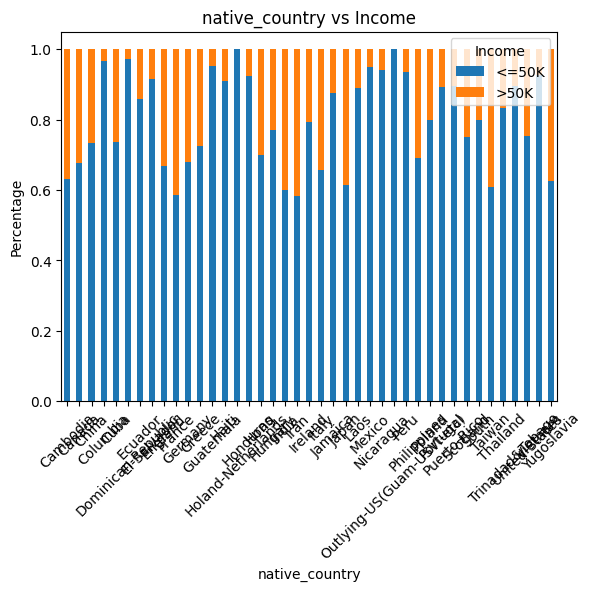

In [23]:
for feature in categorical_features:
  if feature != 'income':
    plt.figure(figsize=(18, 6))
    df_temp = df.groupby([feature, 'income']).size().unstack()
    df_temp_perc = df_temp.div(df_temp.sum(axis=1), axis=0)
    df_temp_perc.plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs Income')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
    plt.legend(title='Income', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

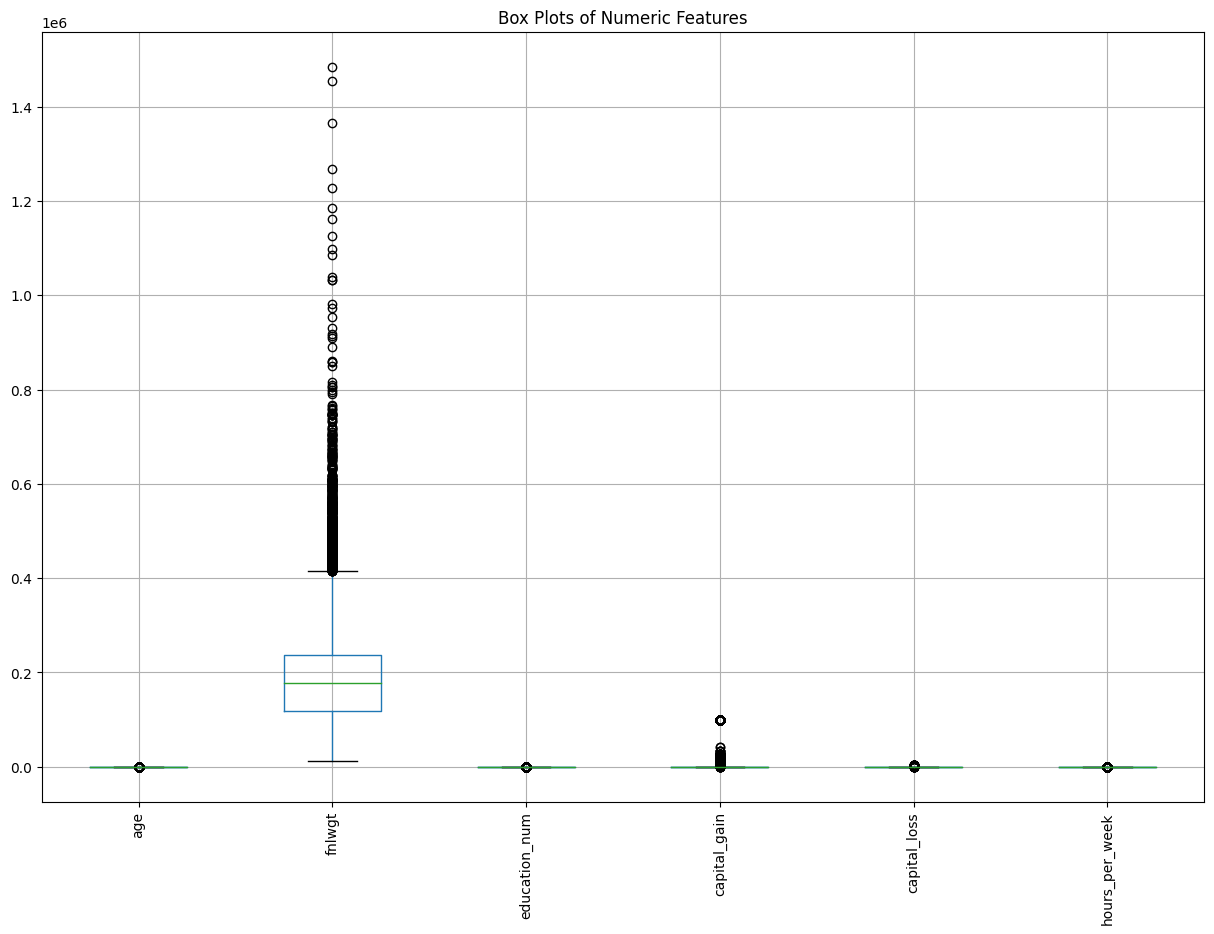

In [24]:
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()